In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
data = pd.DataFrame(digits['data'])

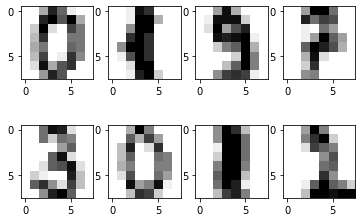

In [4]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')


In [5]:
labels = pd.Series(digits['target'])

In [6]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
target = pd.Series(digits["target"])

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
train = data
#def train(X, y):
fold_accuracies = []
kf = KFold(n_splits = 4, random_state=2, shuffle=True)
highest_train_row = int(data.shape[0] * .75)
train = data.iloc[0:highest_train_row]
test = data.iloc[highest_train_row:]

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
train = data
def train(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    parameters={'algorithm':('brute', 'auto', 'ball_tree', 'kd_tree'), 'n_neighbors':[3, 5, 7, 10, 15, 20], 'weights': ('uniform', 'distance')}
    knn.fit(X_train, y_train)
    clf=GridSearchCV(knn, parameters)
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)

            #predictions=knn.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse=np.sqrt(mean_squared_error(y_test, predictions))
    mae=mean_absolute_error(y_test, predictions)
  #  print(mse, rmse, mae)
   # print(clf.best_params_)
    accuracy = accuracy_score(y_test, predictions)
    return(accuracy)

In [10]:
def cross_validate():
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(train_features, train_labels)
#        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(model)
    print(fold_accuracies)
    return fold_accuracies      
knn_one_accuracies = cross_validate()

[0.9881305637982196, 0.9821958456973294, 0.9851632047477745, 0.9851632047477745]


In [11]:
np.mean(knn_one_accuracies)

0.9851632047477745

Here we can see that the {'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'} produced the best results with an average of 98.5%

In [12]:
def train_knn(model_type, train_features, train_labels):
    model = model_type
    model.fit(train_features, train_labels)
    return model

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(model):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        fit = train_knn(model, train_features, train_labels)
        overall_accuracy = test(fit, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [13]:
knn_one_accuracies = cross_validate(KNeighborsClassifier(n_neighbors = 1))
np.mean(knn_one_accuracies)

0.9888728037614452

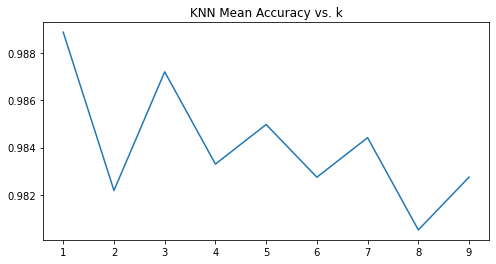

In [14]:
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(KNeighborsClassifier(n_neighbors = k))
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("KNN Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

In [15]:
from sklearn.neural_network import MLPClassifier

knn_one_accuracies = cross_validate(MLPClassifier(hidden_layer_sizes=(8,), activation = 'logistic'))
np.mean(knn_one_accuracies)

C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.882585993565949

C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multi

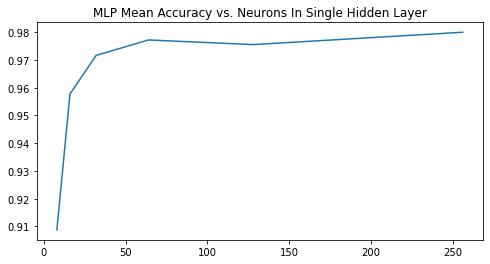

In [16]:
neurons = [(8,), (16,), (32,), (64,), (128,), (256,)]
neurons_overall_accuracies = []

for n in neurons:
    accuracies = cross_validate(MLPClassifier(hidden_layer_sizes=(n), activation = 'logistic'))
    accuracy = np.mean(accuracies)
    neurons_overall_accuracies.append(accuracy)
    
plt.figure(figsize=(8,4))
plt.title("MLP Mean Accuracy vs. Neurons In Single Hidden Layer")
plt.plot(neurons, neurons_overall_accuracies)

In [17]:
neurons_overall_accuracies

[0.9087379361544172,
 0.9577121999505074,
 0.971624597871814,
 0.9771937639198218,
 0.9755246226181638,
 0.9799752536500865]

By adding hidden layers we improved accuracy up to approximately 98%

Being that k-nearest neighbors achieved approximately 98.8% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


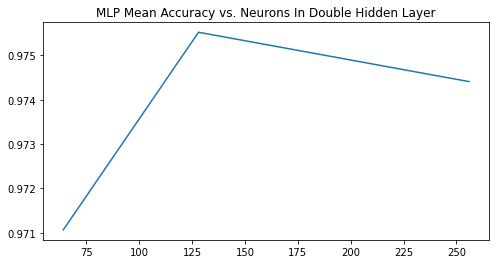

In [18]:
double_neurons = [(64,64), (128,128), (256,256)]
double_overall_accuracies = []

for n in double_neurons:
    accuracies = cross_validate(MLPClassifier(hidden_layer_sizes=(n), activation = 'logistic'))
    accuracy = np.mean(accuracies)
    double_overall_accuracies.append(accuracy)
    
plt.figure(figsize=(8,4))
plt.title("MLP Mean Accuracy vs. Neurons In Double Hidden Layer")
plt.plot([i[0] for i in double_neurons], double_overall_accuracies)

In [19]:
double_overall_accuracies

[0.971066567681267, 0.9755209106656768, 0.9744085622370701]

Using 2 hidden layers doesn't seem to improved our simple accuracy. Using 4-fold cross validation gives some assurance that the model is generalizing.

C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MARKB\anaconda3\lib\site-packages\sklearn\neural_network\_multi

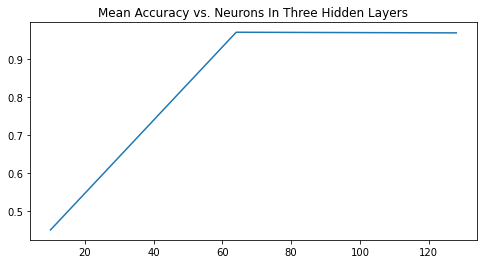

In [20]:
triple_neurons = [(10, 10, 10), (64, 64, 64), (128, 128, 128)]
three_neurons_overall_accuracies = []

for n in triple_neurons:
    accuracies = cross_validate(MLPClassifier(hidden_layer_sizes=(n), activation = 'logistic'))
    accuracy = np.mean(accuracies)
    three_neurons_overall_accuracies.append(accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")
plt.plot([i[0] for i in triple_neurons], three_neurons_overall_accuracies)    


In [21]:
three_neurons_overall_accuracies

[0.45067433803513984, 0.9705122494432071, 0.9688480574115318]

Using 3 hidden layers also sis not improve results, even with 6-fold cross validation.